## Импорты и отрисовка графиков


In [119]:
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
from prompt_toolkit.contrib.regular_languages.compiler import Match
from scipy.stats import norm, gamma


def print_hist(lst, label, title):
    plt.hist(lst, bins=100, density=True, alpha=0.6, color='skyblue', label=label)
    plt.xlabel("y")
    plt.title(title)

## Задание 1

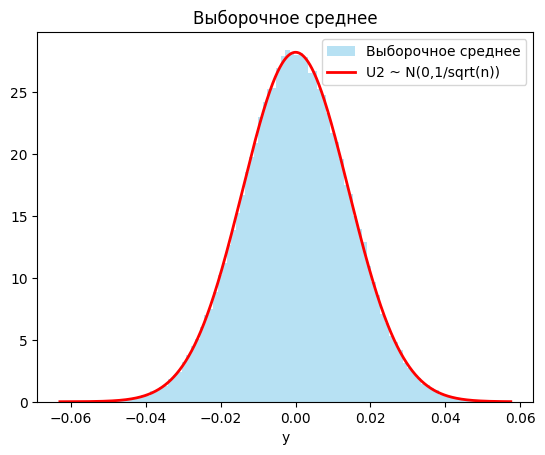

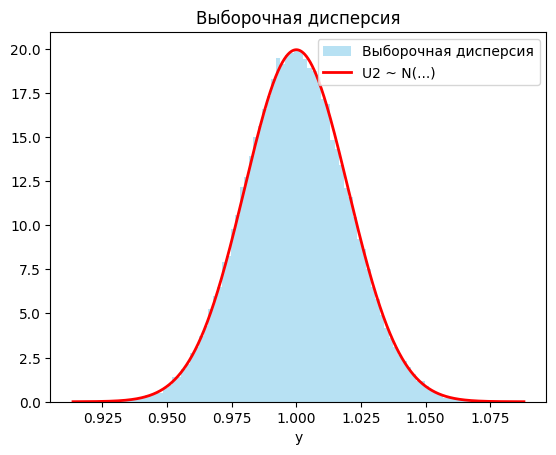

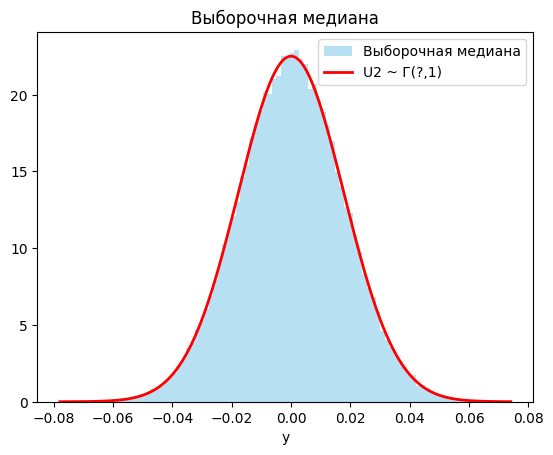

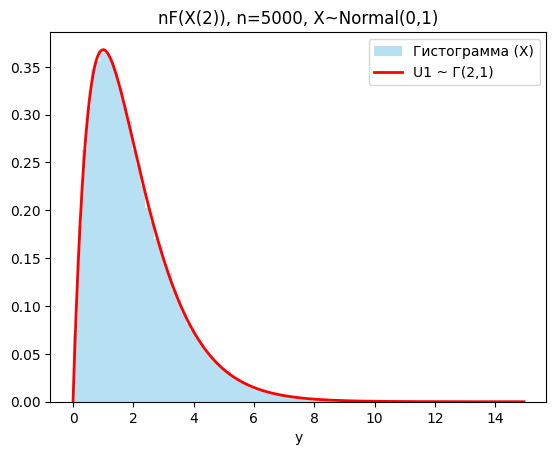

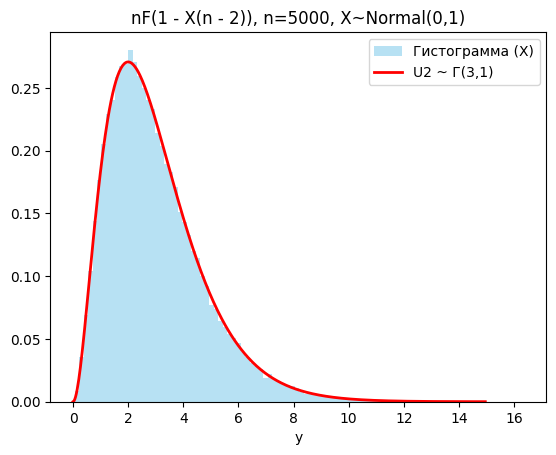

In [120]:
n = 5000
Nsim = 100000

X = norm.rvs(size=(Nsim, n))
X_sorted = np.sort(X, axis=1)

U1 = n * norm.cdf(X_sorted[:, 1])
U2 = n * (1 - norm.cdf(X_sorted[:, -3]))
s_n = sqrt(n)
mean = np.mean(X_sorted, axis=1)
var = np.var(X_sorted, axis=1)
median = np.quantile(X_sorted, 0.5, axis=1)

print_hist(mean, 'Выборочное среднее', 'Выборочное среднее')
x_vals = np.linspace(np.min(mean), np.max(mean), 10000)
plt.plot(x_vals, norm.pdf(x_vals, 0, 1 / s_n), 'r-', lw=2, label='U2 ~ N(0,1/sqrt(n))')
plt.legend()
plt.show()

sigma = sqrt(abs((norm(0, 1).moment(4) - norm(0, 1).moment(2) ** 2) / n))
mu = norm(0, 1).var()
print_hist(var, 'Выборочная дисперсия', 'Выборочная дисперсия')
x_vals = np.linspace(np.min(var), np.max(var), 10000)
plt.plot(x_vals, norm.pdf(x_vals, mu, sigma), 'r-', lw=2, label='U2 ~ N(...)')
plt.legend()
plt.show()

print_hist(median, 'Выборочная медиана', 'Выборочная медиана')
x_vals = np.linspace(np.min(median), np.max(median), 10000)
plt.plot(x_vals, norm.pdf(x_vals, 0, 1/sqrt((4*n*(norm.pdf(0) ** 2)))), 'r-', lw=2, label='U2 ~ Г(?,1)')
plt.legend()
plt.show()

print_hist(U1, 'Гистограмма (X)', f"nF(X(2)), n={n}, X~Normal(0,1)")
x_vals = np.linspace(0, np.max(U1), 500)
plt.plot(x_vals, gamma.pdf(x_vals, a=2, scale=1), 'r-', lw=2, label='U1 ~ Г(2,1)')
plt.legend()
plt.show()

print_hist(U2, 'Гистограмма (X)', f"nF(1 - X(n - 2)), n={n}, X~Normal(0,1)")
x_vals = np.linspace(0, np.max(U1), 500)
plt.plot(x_vals, gamma.pdf(x_vals, a=3, scale=1), 'r-', lw=2, label='U2 ~ Г(3,1)')
plt.legend()
plt.show()

## Задание 2


### Статистика


=== Compact ===
Frequency:   17.204%


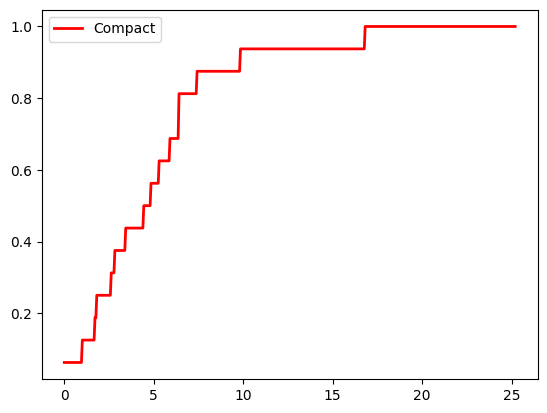

Mean    :    5.031
Variance:   16.569
Median  :    4.600
IQR     :    4.000

=== Large ===
Frequency:   11.828%


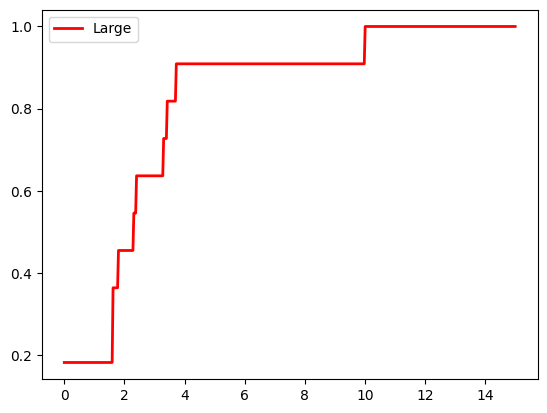

Mean    :    2.736
Variance:    7.319
Median  :    2.300
IQR     :    1.750

=== Midsize ===
Frequency:   23.656%


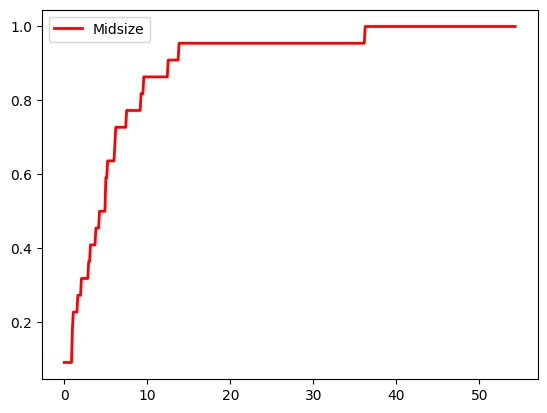

Mean    :    6.200
Variance:   59.648
Median  :    4.600
IQR     :    5.475

=== Small ===
Frequency:   22.581%


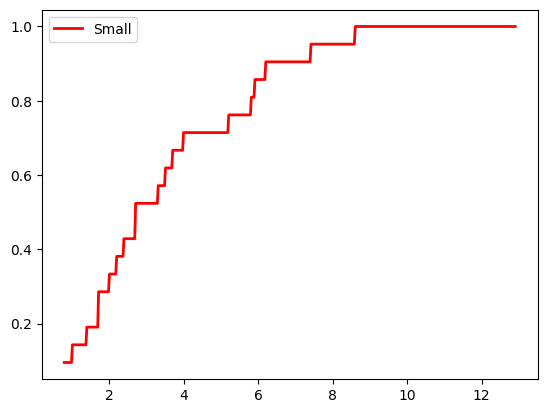

Mean    :    3.476
Variance:    5.046
Median  :    2.700
IQR     :    3.500

=== Sporty ===
Frequency:   15.054%


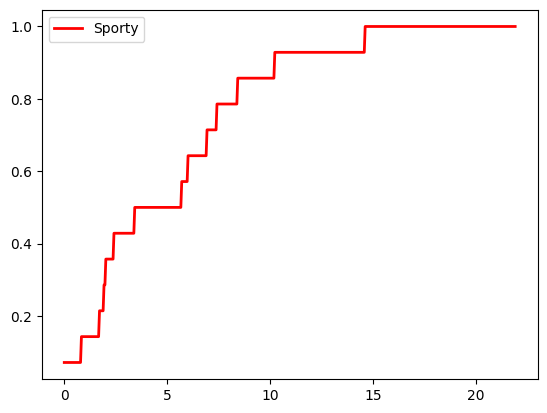

Mean    :    5.100
Variance:   17.149
Median  :    4.550
IQR     :    5.350

=== Van ===
Frequency:    9.677%


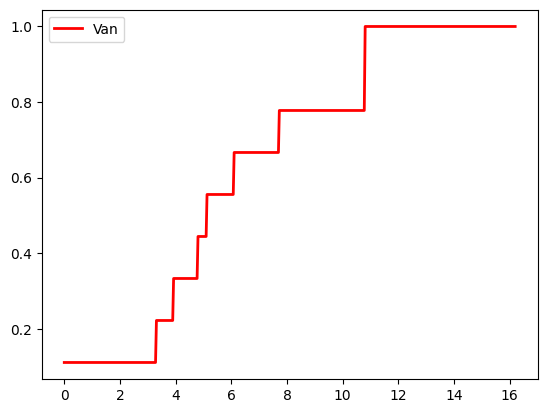

Mean    :    5.833
Variance:   12.335
Median  :    5.100
IQR     :    3.800

=== All types ===
Frequency:  100.000%


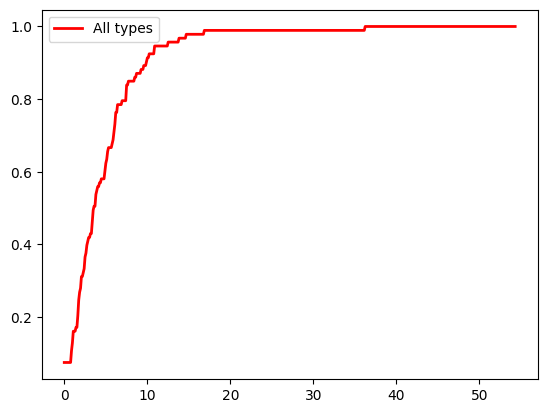

Mean    :    4.773
Variance:   23.210
Median  :    3.500
IQR     :    4.400


In [121]:
data_frame = pd.read_csv('resources/cars93.csv', sep=',')
cars_dict = data_frame.to_dict(orient='records')
cars_list = data_frame.to_numpy()

def create_ecdf(data: list):
        arr = np.array(data)
        return lambda x: np.sum(arr <= x) / arr.size

def printer(X, name):
    x_vals = np.linspace(np.min(X), np.max(X)*1.5, 500)
    ecdf = create_ecdf(X)
    y_vals = []
    for i in x_vals:
        y_vals.append(ecdf(i))
    plt.plot(x_vals, y_vals, 'r-', lw=2, label=name)
    plt.legend()
    plt.show()


for group_name, group_df in list(data_frame.groupby('Type')) + [('All types', data_frame)]:
    print(f"\n=== {group_name} ===")

    group_df = group_df.copy()
    group_df['Diff'] = group_df['Max.Price'] - group_df['Min.Price']

    percentage = len(group_df) * 100 / len(data_frame)
    mean = group_df['Diff'].mean()
    var = group_df['Diff'].var()
    median = group_df['Diff'].median()
    iqr = group_df['Diff'].quantile(0.75) - group_df['Diff'].quantile(0.25)

    stats = {
        "Mean": mean,
        "Variance": var,
        "Median": median,
        "IQR": iqr
    }

    print(f"{"Frequency":8}: {percentage:8.3f}" + "%")
    printer(group_df['Diff'].to_numpy(), group_name)
    for name, value in stats.items():
         print(f"{name:8}: {value:8.3f}")


### Графики


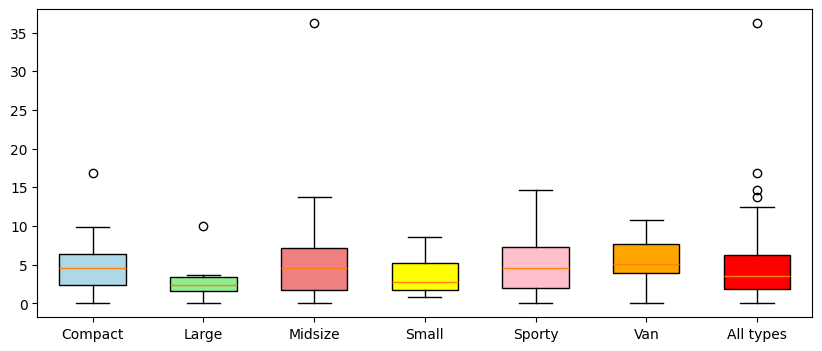

In [122]:
data = []
labels = []

for group_name, group_df in list(data_frame.groupby('Type')) + [('All types', data_frame)]:
    labels.append(group_name)
    group_df = group_df.copy()
    group_df['Diff'] = group_df['Max.Price'] - group_df['Min.Price']
    data.append(group_df['Diff'].to_numpy())
plt.figure(figsize=(10, 4))
boxplot = plt.boxplot(data,tick_labels=labels,patch_artist=True,widths=0.6)

colors = ['lightblue', 'lightgreen', 'lightcoral', 'yellow', 'pink', 'orange', 'red']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
plt.show()

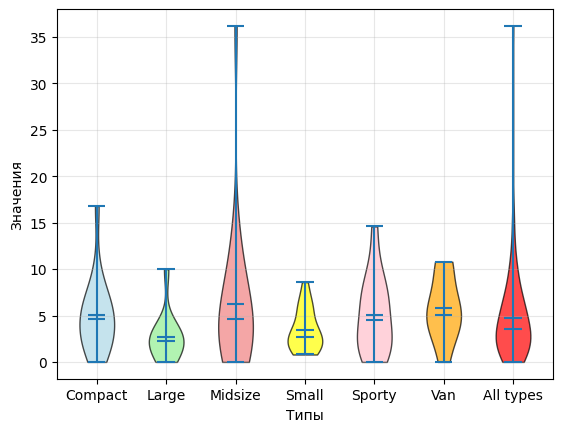

In [126]:
violin_parts = plt.violinplot(data,
                             positions=list(range(1, 8)),
                             showmeans=True,
                             showmedians=True)


for i, pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_alpha(0.7)
    pc.set_edgecolor('black')

plt.xlabel('Типы')
plt.ylabel('Значения')
plt.xticks(list(range(1, 8)), labels)
plt.grid(True, alpha=0.3)
plt.show()